### Building energy efficient

In [2]:
import os
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,7 days 3 hours 46 mins
H2O cluster timezone:,Europe/Rome
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.6
H2O cluster version age:,17 days
H2O cluster name:,francesco
H2O cluster total nodes:,1
H2O cluster free memory:,3.868 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [4]:
fname = "./datasets/ENB2012_data.csv"
data = h2o.import_file(fname)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [10]:
factorsList = ["X6", "X8"]
data[factorsList] = data[factorsList].asfactor() #this convert the vaue to enum
train, test = data.split_frame([0.8])
x = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]
y = "Y2" #Or "Y1"

In [12]:
'''
• X1: Relative Compactness
• X2: Surface Area
• X3: Wall Area
• X4: Roof Area
• X5: Overall Height
• X6: Orientation
• X7: Glazing area
• X8: Glazing area distribution
• Y1: Heating Load
• Y2: Cooling Loatr
'''
train.describe()

Rows:613
Cols:10




,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
type,real,real,real,real,real,enum,real,enum,real,real
mins,0.62,514.5,245.0,110.25,3.5,,0.0,,6.01,10.9
mean,0.7649102773246335,670.8923327895593,319.8988580750404,175.4967373572592,5.287112561174557,,0.23442088091354002,,22.450978792822205,24.689396411092982
maxs,0.98,808.5,416.5,220.5,7.0,,0.4,,43.1,47.59
sigma,0.10543653471031926,87.81769490915285,44.43369572393613,45.3316729164403,1.75103526298337,,0.1333254863666696,,10.119110456261463,9.445957349893135
zeros,0,0,0,0,0,,40,,0,0
missing,0,0,0,0,0,0,0,0,0,0
0,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
2,0.9,563.5,318.5,122.5,7.0,2,0.0,0,20.84,28.28


Pearson correlation. (As we will see in a moment, our data is not normally
distributed, so Spearman correlation would be more appropriate.

X6 an X8 are enum so the spearmin correlaton is nan

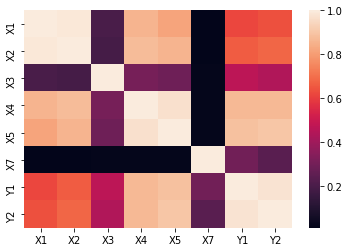

In [41]:
import seaborn
corrMatrix = train[sorted(list(set(train.columns) - set(['X6','X8'])))].cor().round(2)
corrMatrix = corrMatrix.as_data_frame()
corrMatrix.index = sorted(corrMatrix.columns)
seaborn.heatmap(abs(corrMatrix))

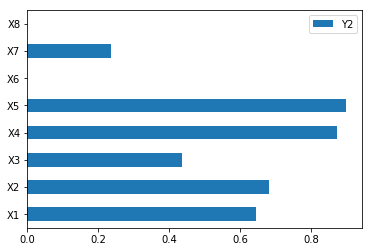

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
res = train[x].cor(train[y]).as_data_frame()
res.index = x
abs(res).plot.barh()
plt.show()

screams at us, if we hadn’t already looked at the paper, is
the clustering of values, which tells us that most of these variables are more like
ordered factors, not continuous numbers. This was why I set breaks higher than the
default gave me: with fewer bars this is less clear

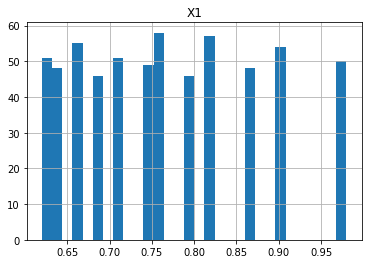

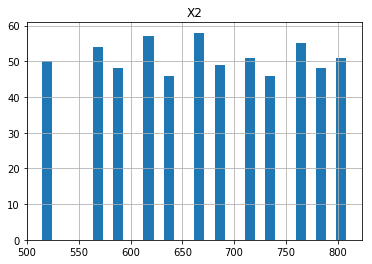

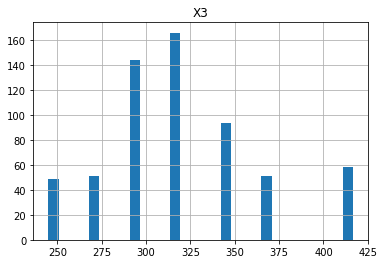

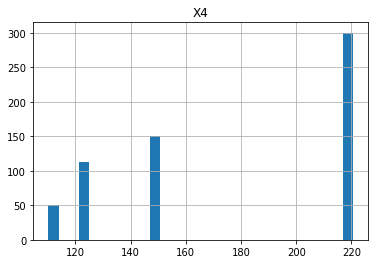

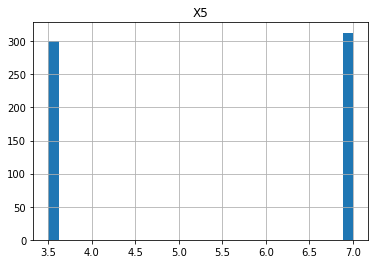

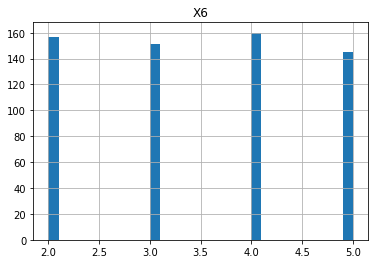

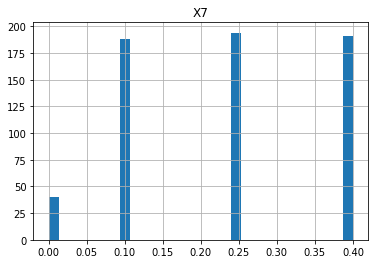

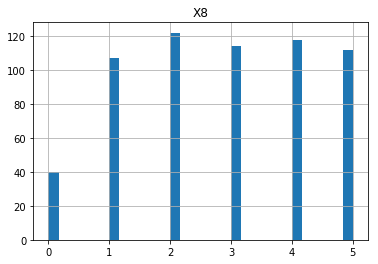

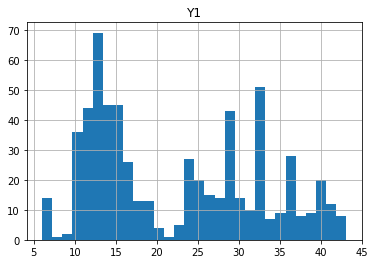

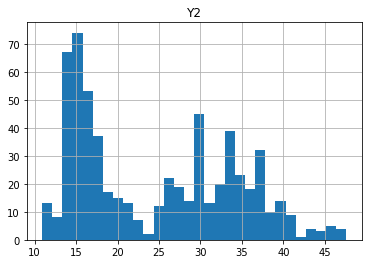

In [51]:
for field in train.columns:
    train[:,field].as_data_frame().hist(bins=30)